<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/flight_delay_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import io 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif

In [4]:
from google.colab import files
uploaded = files.upload()

Saving flight_delays_train (1).csv to flight_delays_train (1).csv


In [5]:
train_df = pd.read_csv(io.BytesIO(uploaded['flight_delays_train (1).csv']))
train_df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [6]:
from google.colab import files
uploaded = files.upload()

Saving flight_delays_test.csv to flight_delays_test.csv


In [7]:
test_df = pd.read_csv(io.BytesIO(uploaded['flight_delays_test.csv']))
test_df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [8]:
train_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [9]:
test_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1338.936600,723.13011
std,480.554102,563.22322
min,1.000000,31.00000
25%,928.000000,321.00000
50%,1329.000000,574.00000
75%,1733.000000,948.00000
max,2400.000000,4962.00000


In [10]:
train_df.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [11]:
test_df.dtypes

Month            object
DayofMonth       object
DayOfWeek        object
DepTime           int64
UniqueCarrier    object
Origin           object
Dest             object
Distance          int64
dtype: object

In [12]:
#function which is used when need NaN value replace on median
def delete_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [13]:
# Remove unnecessary variables and convert them to numeric format for train set
train_df['Month'] = train_df['Month'].map(lambda x: x.strip('c-')).astype(int)
train_df['DayOfWeek'] = train_df['DayOfWeek'].map(lambda x: x.strip('c-')).astype(int)
train_df['DayofMonth'] = train_df['DayofMonth'].map(lambda x: x.strip('c-')).astype(int)

In [14]:
# Remove unnecessary variables and convert them to numeric format for test set
test_df['Month'] = test_df['Month'].map(lambda x: x.strip('c-')).astype(int)
test_df['DayOfWeek'] = test_df['DayOfWeek'].map(lambda x: x.strip('c-')).astype(int)
test_df['DayofMonth'] = test_df['DayofMonth'].map(lambda x: x.strip('c-')).astype(int)

<Axes: >

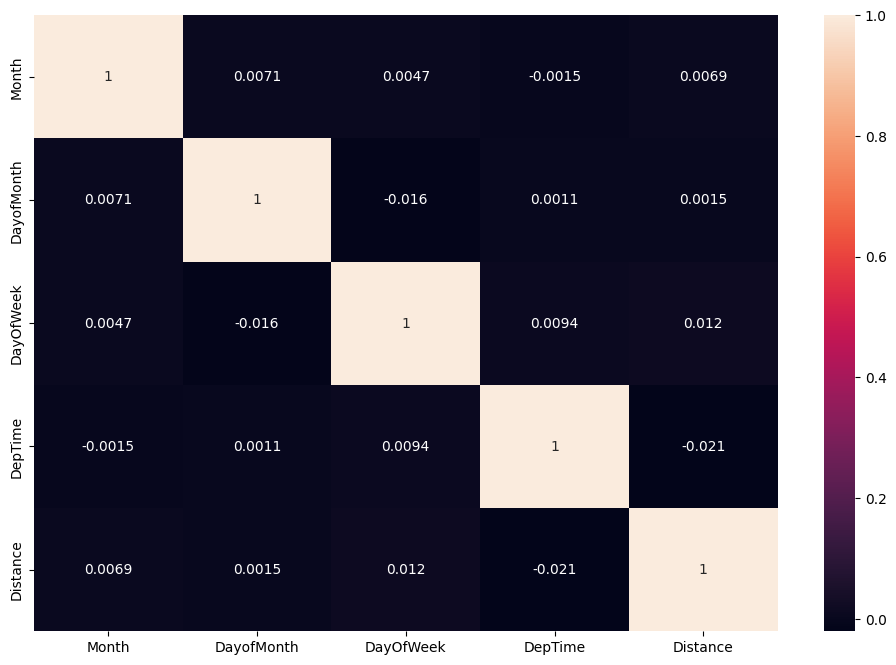

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot = True)

In [16]:
for i in train_df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance']]:
  train_df.sort_values(by = i, ascending= True, na_position = 'last')
  q1,q3 = np.percentile(train_df[i], [25,75])
  screw = q3 - q1
  low_bound = q1 - 1.5*screw
  up_bound = q3 + 1.5*screw
  outliers_values = train_df[i][(low_bound > train_df[i]) | (up_bound < train_df[i])]
  perc_outliers = (outliers_values.count()/train_df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i,perc_outliers, outliers_values.count()))
#As we can see, we have a small amount of outliers, that's why we will leave them unchanged

Outliers in Month is 0.00% with count 0
Outliers in DayofMonth is 0.00% with count 0
Outliers in DayOfWeek is 0.00% with count 0
Outliers in DepTime is 0.00% with count 0
Outliers in Distance is 5.54% with count 5540


In [17]:
# Convert target variable into 1 and 0
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y':1, 'N':0})

In [18]:
# Encode categorical features
train_df = pd.get_dummies(train_df, columns = ['UniqueCarrier','Origin', 'Dest'])

In [19]:
# Define p-value for each feature
X = train_df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance']]

regressor_OLS = sm.OLS(endog=train_df['dep_delayed_15min'], exog= X).fit()
max_pvalue = max(regressor_OLS.pvalues)
pvalues = regressor_OLS.pvalues
pvalues[pvalues > 0.05]

DayofMonth    0.908613
dtype: float64

In [20]:
X, y = train_df.drop('dep_delayed_15min', axis = 1), train_df.dep_delayed_15min
X_train, X_valid, y_train, y_valid   = train_test_split(X, y, test_size=0.3, random_state=17)
X.shape, y.shape

((100000, 605), (100000,))

In [21]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_valid_scaled = scaled.transform(X_valid)

# Reduce sample size using PCA method to 50% 
pca = PCA(n_components=0.5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

In [22]:
X_train_log = np.log(X_train + 1)
X_valid_log = np.log(X_valid + 1)

In [23]:
from sklearn.feature_selection import VarianceThreshold

# Create a variance threshold object
var_thresh = VarianceThreshold()

# Fit the object to the training data
var_thresh.fit(X_train_scaled)

# Get the indices of non-constant features
non_constant_indices = var_thresh.get_support(indices=True)

# Use only the non-constant features in the dataset
X_train_non_constant = X_train_scaled[:, non_constant_indices]
X_valid_non_constant = X_valid_scaled[:, non_constant_indices]

# Apply feature selection using SelectPercentile
select = SelectPercentile(score_func=f_classif, percentile=40)
X_train_select = select.fit_transform(X_train_non_constant, y_train)
X_valid_select = select.transform(X_valid_non_constant)

# XGBClassifier


In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [ ]:
xgb2 = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

grid = RandomizedSearchCV(xgb2, param_grid, cv = 5, n_jobs=-1, verbose=1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [3, 5, 7],
                                        'subsample': [0.5, 0.7, 1.0]},
                   verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'subsample': 0.5, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
0.8094428571428572


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_valid_pca)

In [ ]:
accuracy_score(y_valid, y_pred)

0.8107333333333333

# Logistic Regression

In [28]:
lr = LogisticRegression(random_state=17, class_weight="balanced")
parameters = {"C": (0.001, 0.01, 0.1, 1, 10), 'max_iter':[1000]}
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)

In [33]:
grid = GridSearchCV(lr, parameters, scoring ='roc_auc', cv=skf, n_jobs = -1)
grid.fit(X_train_select, y_train)
grid.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=17)

In [34]:
best_model1 = grid.best_estimator_
grid.best_score_

0.7036460665497366

In [36]:
prediction = best_model1.predict(X_valid_select)

In [37]:
print('Roc score', roc_auc_score(y_valid, prediction))

Roc score 0.6381228770013153
